#Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

#Baca Dataset

In [ ]:
df = pd.read_excel('https://github.com/Adkurrr/customer-segmentation-using-DSScan-Cluster/blob/main/case_study1_Data_Retail.xlsx?raw=true')
df.head()

,No_Invoice,ID_Stock,Description,Quantity,Invoice_Date,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,UK
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,UK
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,UK
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,UK
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,UK


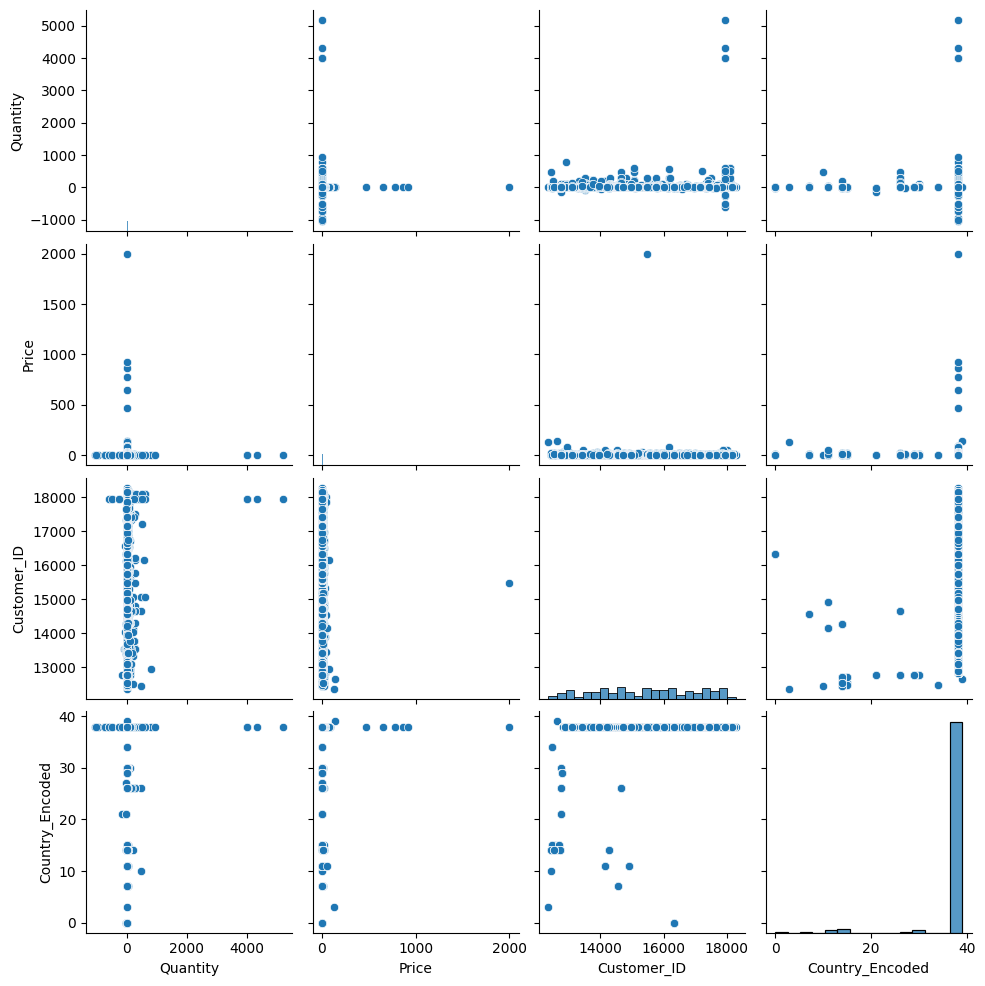

In [ ]:
sns.pairplot(df[:10485])

#Praproses Data

###Cek tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   No_Invoice    1048575 non-null  object        
 1   ID_Stock      1048575 non-null  object        
 2   Description   1044203 non-null  object        
 3   Quantity      1048575 non-null  int64         
 4   Invoice_Date  1048575 non-null  datetime64[ns]
 5   Price         1048575 non-null  float64       
 6   Customer_ID   811893 non-null   float64       
 7   Country       1048575 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 64.0+ MB


###Mengubah tipe data

In [ ]:
label_encoder = LabelEncoder()
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])

###Mengatasi missing value

In [ ]:
# Memeriksa missing values
print("Jumlah missing values sebelum preprocessing:")
print(df.isnull().sum())

Jumlah missing values sebelum preprocessing:
No_Invoice              0
ID_Stock                0
Description          4372
Quantity                0
Invoice_Date            0
Price                   0
Customer_ID        236682
Country                 0
Country_Encoded         0
dtype: int64


Terdapat 2 kolom yang memiliki missing value yaitu kolom Description sebanyak 4372 baris data dan customer ID sebanyak 2336682 baris data.

In [ ]:
# Preprocessing: Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Memeriksa kembali missing values setelah imputasi
print("\nJumlah missing values setelah preprocessing:")
print(data_imputed.isnull().sum())


Jumlah missing values setelah preprocessing:
No_Invoice         0
ID_Stock           0
Description        0
Quantity           0
Invoice_Date       0
Price              0
Customer_ID        0
Country            0
Country_Encoded    0
dtype: int64


###Drop kolom yang tidak digunakan

In [ ]:
# Preprocessing: Scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.drop(['No_Invoice', 'ID_Stock', 'Invoice_Date', 'Description','Country'], axis=1))

#Clustering

In [ ]:
len(data_scaled)

1048575

jumlah data hasil praproses sebanyak 1.048.575. Pada proses cluster ini agar program dapat berjalan dengan lancar, kami membagi jumlah nilai yang didapat dengan 100.

In [ ]:
total_data = len(data_scaled)
subset_size = total_data // 100
subset_data = data_scaled[:subset_size]

In [ ]:
# Menerapkan DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)
clusters = dbscan.fit_predict(subset_data)

In [ ]:
# Menyimpan hasil clustering ke dalam DataFrame
results = pd.DataFrame({'Cluster': clusters})

# Memeriksa jumlah cluster yang dihasilkan
print("\nJumlah cluster yang dihasilkan:", len(np.unique(clusters)))


Jumlah cluster yang dihasilkan: 3


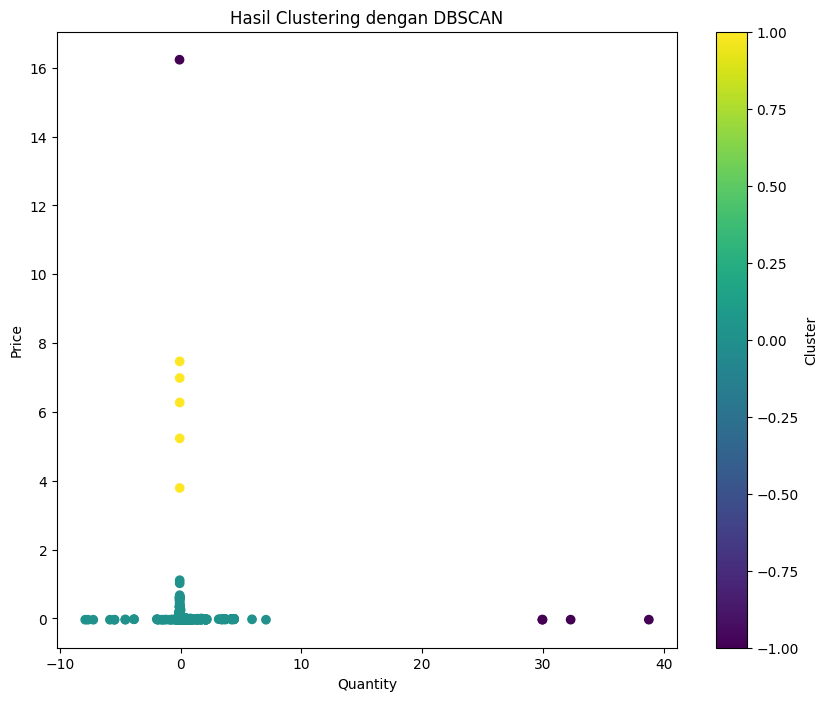

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
plt.scatter(subset_data[:, 0], subset_data[:, 1], c=clusters, cmap='viridis')
plt.title('Hasil Clustering dengan DBSCAN')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()

#Silhoutte Score

In [ ]:
silhouette_avg = silhouette_score(subset_data, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7917808650792751


Berdasarkan nilai Silhouette Score sebesar 0.7750081597841336 yang diperoleh dari hasil clustering dengan DBSCAN pada data, dapat disimpulkan bahwa klaster-klasternya memiliki tingkat kohesi yang tinggi dan tingkat separasi yang baik. Ini menunjukkan bahwa DBSCAN berhasil menemukan pola atau struktur yang signifikan dalam data, memungkinkan pembentukan klaster yang baik dengan sampel-sampel yang mirip dikelompokkan bersama. Meskipun nilai Silhouette Score yang tinggi memberikan indikasi kualitas clustering yang baik, evaluasi lebih lanjut tetap diperlukan untuk memastikan kesesuaian parameter dan interpretasi struktur klaster secara lebih mendalam. Evaluasi visual seperti t-SNE atau PCA setelah clustering juga dapat memberikan wawasan tambahan tentang seberapa baik klaster-klasternya terpisah dalam ruang fitur yang direduksi.